<a href="https://colab.research.google.com/github/aasthagoyal46/ImageClassification/blob/master/PyTorchCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


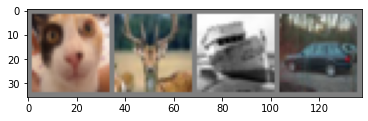

  cat    deer    ship     car


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('   '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net1 = Net()

In [0]:
import torch.optim as optim

def train(net, epoch, lr, momentum):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
  
  for epoch in range(epoch):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0
  
  print('Finished Training')

In [0]:
def checkAccuracy(net):
  correct = 0
  total = 0
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))

  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

          c = (predicted == labels).squeeze()
          for i in range(4):
              label = labels[i]
              class_correct[label] += c[i].item()
              class_total[label] += 1

  print('Accuracy of the network on the 10000 test images: %d %% \n' % (
      100 * correct / total))

  for i in range(10):
      print('Accuracy of %5s : %2d %%' % (
          classes[i], 100 * class_correct[i] / class_total[i]))

In [7]:
train(net1, 5, 0.001, 0.9)

[1,  2000] loss: 2.234
[1,  4000] loss: 1.891
[1,  6000] loss: 1.697
[1,  8000] loss: 1.576
[1, 10000] loss: 1.532
[1, 12000] loss: 1.493
[2,  2000] loss: 1.438
[2,  4000] loss: 1.376
[2,  6000] loss: 1.361
[2,  8000] loss: 1.367
[2, 10000] loss: 1.287
[2, 12000] loss: 1.296
[3,  2000] loss: 1.224
[3,  4000] loss: 1.222
[3,  6000] loss: 1.197
[3,  8000] loss: 1.197
[3, 10000] loss: 1.180
[3, 12000] loss: 1.185
[4,  2000] loss: 1.114
[4,  4000] loss: 1.115
[4,  6000] loss: 1.108
[4,  8000] loss: 1.101
[4, 10000] loss: 1.121
[4, 12000] loss: 1.101
[5,  2000] loss: 1.020
[5,  4000] loss: 1.027
[5,  6000] loss: 1.035
[5,  8000] loss: 1.052
[5, 10000] loss: 1.072
[5, 12000] loss: 1.046
Finished Training


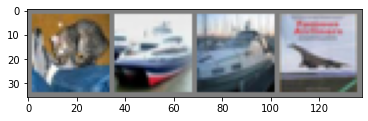

GroundTruth:    cat  ship  ship plane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net1(images)

In [10]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [12]:
checkAccuracy(net1)

Accuracy of the network on the 10000 test images: 61 % 

Accuracy of plane : 53 %
Accuracy of   car : 72 %
Accuracy of  bird : 50 %
Accuracy of   cat : 37 %
Accuracy of  deer : 55 %
Accuracy of   dog : 63 %
Accuracy of  frog : 74 %
Accuracy of horse : 65 %
Accuracy of  ship : 74 %
Accuracy of truck : 70 %
